In [1]:
import os

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

In [3]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

In [4]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'Internet.xlsx'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\Internet.xlsx'

In [7]:
penetracion_hogares = pd.read_excel(
    ruta_del_dataset, 
    sheet_name='Penetracion-hogares'
    )

In [8]:
penetracion_hogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.840000
1,2024,2,Capital Federal,116.370000
2,2024,2,Catamarca,68.810000
3,2024,2,Chaco,44.060000
4,2024,2,Chubut,86.330000
...,...,...,...,...
995,2014,1,La Rioja,16.294105
996,2014,1,Mendoza,31.913123
997,2014,1,Misiones,23.136539
998,2014,1,Neuquén,49.791605


In [9]:
penetracion_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [16]:
accesos_a_lo_largo_del_tiempo = pd.DataFrame(penetracion_hogares.groupby('Año', as_index=False)['Accesos por cada 100 hogares'].mean())

accesos_a_lo_largo_del_tiempo

,Año,Accesos por cada 100 hogares
0,2014,37.335129
1,2015,39.198153
2,2016,39.889283
3,2017,42.525228
4,2018,48.477593
5,2019,53.666356
6,2020,56.130637
7,2021,61.978518
8,2022,67.823625
9,2023,70.042812


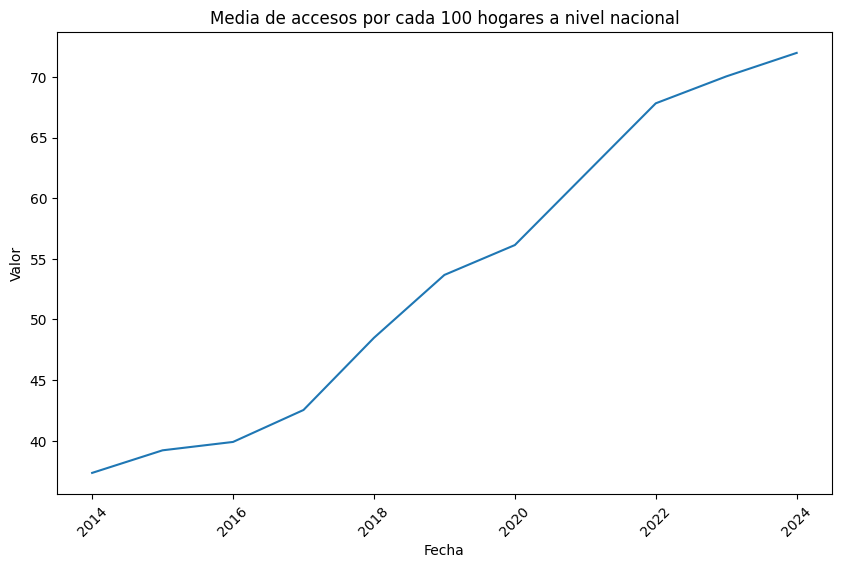

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=accesos_a_lo_largo_del_tiempo)
plt.title('Media de accesos por cada 100 hogares a nivel nacional')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

In [22]:
accesos_a_lo_largo_del_tiempo = pd.DataFrame(penetracion_hogares.groupby(['Año', 'Provincia'], as_index=False)[['Accesos por cada 100 hogares']].mean())

accesos_a_lo_largo_del_tiempo

,Año,Provincia,Accesos por cada 100 hogares
0,2014,Buenos Aires,55.620141
1,2014,Capital Federal,113.523688
2,2014,Catamarca,24.793693
3,2014,Chaco,21.164996
4,2014,Chubut,40.873343
...,...,...,...
259,2024,Santa Cruz,68.750000
260,2024,Santa Fe,80.870000
261,2024,Santiago Del Estero,49.540000
262,2024,Tierra Del Fuego,109.335000


In [26]:
accesos_a_lo_largo_del_tiempo[accesos_a_lo_largo_del_tiempo['Año'] == 2024]

,Año,Provincia,Accesos por cada 100 hogares
240,2024,Buenos Aires,80.470
241,2024,Capital Federal,117.950
242,2024,Catamarca,68.815
243,2024,Chaco,45.380
244,2024,Chubut,85.610
245,2024,Corrientes,51.660
246,2024,Córdoba,90.745
247,2024,Entre Ríos,68.975
248,2024,Formosa,39.650
249,2024,Jujuy,57.975


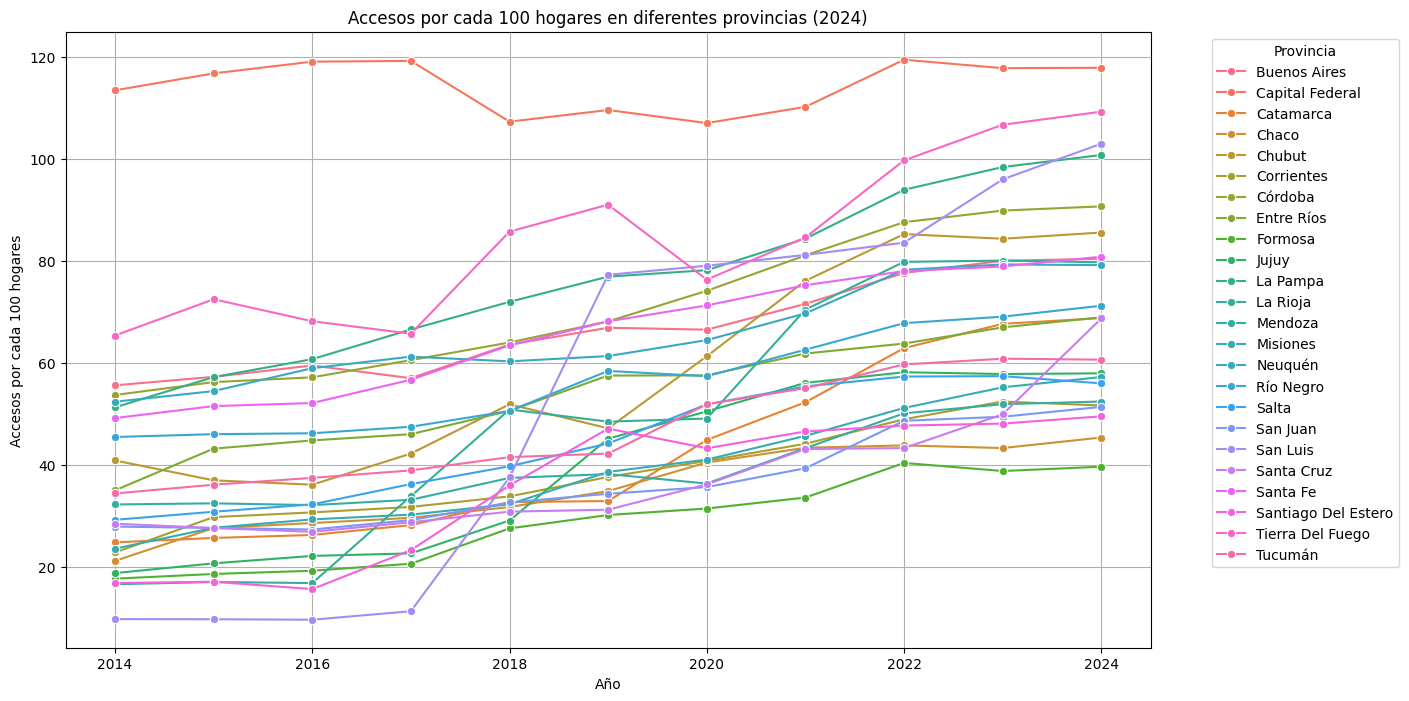

In [28]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', marker='o', data=accesos_a_lo_largo_del_tiempo)
plt.title('Accesos por cada 100 hogares en diferentes provincias (2024)')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()